# Case Study 1

#### Model selection for Clustering

Clustering is unsupervised learning: the resulting clusters are completely derived from data distributed in given a feature set with no class available

Compared to supervised learning counterparts, it is …
* hard to define model performance (cluster quality)
* sensitive to different clustering algorithms and different feature spaces.



#### Task
Your task is to try different clustering algorithms and also a range of the potential parameter(s) which affect the number of clusters including ..

* K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Gaussian Mixture Model, 
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* Hierarchical Clustering, 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
* Louvain Clustering, 
https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering

on 5K colorectal patches represented by 4 different representation PathologyGAN, ResNet50, InceptionV3 and VGG16


#### Data and its preprocessing 
5,000 non-overlapping image patches from hematoxylin & eosin (H&E) stained histological images of human colorectal cancer (CRC) and normal tissue.
* 4 feature sets, PathologyGAN, ResNet50, InceptionV3 and VGG16, are extracted to represent those 5,000 images different dimensional feature spaces.
* PCA and UMAP were employed to reduce each feature sapce into 100-dimensional vectors

* 9 tissue types are also available which include Adipose (ADI), background (BACK), debris (DEB), lymphocytes (LYM), mucus (MUC), smooth muscle (MUS), normal colon mucosa (NORM), cancer-associated stroma (STR), colorectal adenocarcinoma epithelium (TUM)


#### Performance Measurement
To assess quality of clustering solutions, several approaches are expected to be done and interpreted which include...
* Silhouette Score for goodness of fit test
* Vmeasure Score for homogeneity and completeness test (tissue type available as ground truth)
* Clusters visualisations

For more information, please have a check...
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


#### Report
Report on your preprocessing pipeline, theory and intuition behinds each algorithm and representation, parameter searching and performance evaluation frameworks. If there is any addiotional process, give evidences/justifications on how it helps.

#### Required Packages

In [49]:
#!pip install h5py==2.10.0
#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install scikit-network==0.26.0
#!pip install pickle-mixin==1.0.2
#!pip install matplotlib
#!pip install plotly

### Prepare Tissue Representations

In [50]:
import h5py
import numpy as np
import pickle

In [51]:
pge_path = 'colon_nct_feature/pge_dim_reduced_feature.h5'
resnet50_path = 'colon_nct_feature/resnet50_dim_reduced_feature.h5'
inceptionv3_path = 'colon_nct_feature/inceptionv3_dim_reduced_feature.h5'
vgg16_path = 'colon_nct_feature/vgg16_dim_reduced_feature.h5'

pge_content = h5py.File(pge_path, mode='r')
resnet50_content = h5py.File(resnet50_path, mode='r')
inceptionv3_content = h5py.File(inceptionv3_path, mode='r')
vgg16_content = h5py.File(vgg16_path, mode='r')


In [52]:
vgg16_content

<HDF5 file "vgg16_dim_reduced_feature.h5" (mode r)>

In [53]:
#PCA feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_pca_feature  = pge_content['pca_feature'][...]
resnet50_pca_feature  = resnet50_content['pca_feature'][...]
inceptionv3_pca_feature = inceptionv3_content['pca_feature'][...]
vgg16_pca_feature  = vgg16_content['pca_feature'][...]

In [54]:
vgg16_pca_feature

array([[ -90.864815 ,  107.03243  ,  116.16385  , ...,    8.259951 ,
          -1.1383446,   -9.175951 ],
       [ -74.06226  ,  117.31615  ,   95.24547  , ...,   -1.9739974,
           6.8172655,    4.2547903],
       [ -81.875336 ,  122.84872  ,   83.767784 , ...,   -1.3287221,
          13.65623  ,  -11.109545 ],
       ...,
       [  32.70835  ,   31.183935 ,  -47.30978  , ...,    4.2004256,
           3.599823 ,    6.0058775],
       [ -39.911785 , -105.81029  ,  122.37118  , ...,  -14.908715 ,
          -1.1814455,  -10.837135 ],
       [  32.35425  ,  -50.3373   ,   66.50197  , ...,   -3.859397 ,
          -1.047523 ,    2.3827858]], dtype=float32)

In [55]:
#UMAP feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_umap_feature  = pge_content['umap_feature'][...]
resnet50_umap_feature = resnet50_content['umap_feature'][...]
inceptionv3_umap_feature  = inceptionv3_content['umap_feature'][...]
vgg16_umap_feature  = vgg16_content['umap_feature'][...]

In [56]:
#tissue type as available ground-truth: labels
filename  = np.squeeze(pge_content['file_name'])
filename = np.array([str(x) for x in filename])
labels = np.array([x.split('/')[2] for x in filename])
labels

array(['ADI', 'ADI', 'ADI', ..., 'TUM', 'TUM', 'TUM'], dtype='<U4')

# PathologyGAN Analysis

In [57]:
import random

In [58]:
random.seed(0)
selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 4000)
pge_umap_index = random.sample(list(np.arange(len(pge_umap_feature))), 4000)

In [59]:
#Innitialize feature arrays
#PathologyGAN PCA Features
pathology = pge_pca_feature[selected_index]
t_label = labels[selected_index]

#PathologyGAN UMAP Features
pathology_umap = pge_umap_feature[pge_umap_index]
u_label = labels[pge_umap_index]

pathology.shape
pathology_umap.shape


(4000, 100)

# ResNet50 Analysis

In [60]:
import random

random.seed(0)
resnet_pca_index = random.sample(list(np.arange(len(resnet50_pca_feature))), 4000)
resnet_umap_index = random.sample(list(np.arange(len(resnet50_umap_feature))), 4000)


In [61]:
#Innitialize feature arrays
#ResNet50 PCA Features
resnet_pca = resnet50_pca_feature[resnet_pca_index]
resnetp_label = labels[resnet_pca_index]

#ResNet50 UMAP Features
resnet_umap = resnet50_umap_feature[resnet_umap_index]
resnetu_label = labels[resnet_umap_index]

resnet_pca.shape
resnet_umap.shape

(4000, 100)

### Exploratory Analysis

In [62]:
import plotly.graph_objects as go
import pandas as pd

In [63]:
traces = []
for name in np.unique(labels):
    trace = go.Scatter3d(
        x=pathology[t_label==name,0],
        y=pathology[t_label==name,1],
        z=pathology[t_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="First 3 pricipal components of PathologyGAN's PCA feature",
    legend_title="Legend Title",
)

fig.show()


C:\Users\Asus\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\Asus\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:494: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




### Model training

In [64]:
from sklearn.cluster import AgglomerativeClustering



# Model Training for PathologyGan using Hierarchical Clustering

In [65]:
#AgglomerativeClustering() on pathologyGAN PCA Features
n_clusters = 9
heirarchical_model = AgglomerativeClustering(n_clusters=n_clusters, affinity = "euclidean", linkage="average")
heirarchical_assignment = heirarchical_model.fit_predict(pathology)

#AgglomerativeClustering() on pathologyGAN UMAP Features
heirarchical_model_umap = AgglomerativeClustering(n_clusters=n_clusters, affinity="euclidean", linkage="ward")
heirarchical_assignment_umap = heirarchical_model_umap.fit_predict(pathology_umap)

# Model Training for ResNet50 using Hierarchical Clustering

In [66]:
#AgglomerativeClustering() on ResNet50 PCA Features
n_clusters = 9
heirarchical_model_rpca = AgglomerativeClustering(n_clusters=n_clusters, affinity = "cosine", linkage="average")
heirarchical_assignment_rpca = heirarchical_model_rpca.fit_predict(resnet_pca)

#AgglomerativeClustering() on ResNet50 UMAP Features
heirarchical_model_rumap = AgglomerativeClustering(n_clusters=n_clusters, affinity="euclidean", linkage="ward")
heirarchical_assignment_rumap = heirarchical_model_rumap.fit_predict(resnet_umap)

### Evaluation and Visualisation

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.model_selection import KFold, train_test_split

* check out number of clusters/cluster assignment counts

# Cluster assignment count pge_umap

In [68]:
#counts for pathologyGAN UMAP
heirarchical_counts_umap = np.unique(heirarchical_assignment_umap, return_counts = True)
print('Number of clusters from Hierarchical clustering on pge_umap: %d'%(np.unique(heirarchical_assignment_umap).shape[0]))
print('Heirarchical assignment counts')
pd.DataFrame({'Cluster Index': heirarchical_counts_umap[0], 'Number of members':heirarchical_counts_umap[1]}).set_index('Cluster Index')

Number of clusters from Hierarchical clustering on pge_umap: 9
Heirarchical assignment counts


,Number of members
Cluster Index,
0,773
1,861
2,106
3,525
4,439
5,83
6,307
7,392
8,514


# Cluster Assignment count pge_pca

In [69]:
#counts for pathologyGAN PCA
heirarchical_counts = np.unique(heirarchical_assignment, return_counts = True)
print('Number of clusters from Hierarchical clustering on pge_pca: %d'%(np.unique(heirarchical_assignment).shape[0]))
print('Heirarchical assignment counts')
pd.DataFrame({'Cluster Index': heirarchical_counts[0], 'Number of members':heirarchical_counts[1]}).set_index('Cluster Index')

Number of clusters from Hierarchical clustering on pge_pca: 9
Heirarchical assignment counts


,Number of members
Cluster Index,
0,46
1,2824
2,3
3,45
4,4
5,7
6,1068
7,1
8,2


* Assess goodness of fit by silhouette score and cluster homogeneities by V-measure

# Optimized Metrics performance on pge_pca

In [70]:
#Evaluation of Hierarchical clustering on pge_pca
heirarchical_silhouette = silhouette_score(pathology, heirarchical_assignment)
heirarchical_v_measure = v_measure_score(t_label, heirarchical_assignment)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Heirarchical pge_pca': [heirarchical_silhouette, heirarchical_v_measure]}).set_index('Metrics')

,Heirarchical pge_pca
Metrics,
silhouette,0.213347
V-measure,0.217785


# Optimized Metrics performance on pge_umap

In [71]:
#Evaluation of Hierarchical clustering on pge_umap
heirarchical_silhouette_umap = silhouette_score(pathology_umap, heirarchical_assignment_umap)
heirarchical_v_measure_umap = v_measure_score(u_label, heirarchical_assignment_umap)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Heirarchical pge_umap': [heirarchical_silhouette_umap, heirarchical_v_measure_umap]}).set_index('Metrics')

,Heirarchical pge_umap
Metrics,
silhouette,0.521023
V-measure,0.537250


# Optimized Metrics performance on resnet_pca

In [72]:
#Evaluation of Hierarchical clustering on resnet_pca
heirarchical_silhouette_rpca = silhouette_score(resnet_pca, heirarchical_assignment_rpca)
heirarchical_v_measure_rpca = v_measure_score(resnetp_label, heirarchical_assignment_rpca)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Heirarchical resnet_pca': [heirarchical_silhouette_rpca, heirarchical_v_measure_rpca]}).set_index('Metrics')

,Heirarchical resnet_pca
Metrics,
silhouette,0.116598
V-measure,0.551785


# Optimized Metrics performance on resnet_umap

In [73]:
#Evaluation of Hierarchical clustering on pge_pca
heirarchical_silhouette_rumap = silhouette_score(resnet_umap, heirarchical_assignment_rumap)
heirarchical_v_measure_rumap = v_measure_score(resnetu_label, heirarchical_assignment_rumap)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Heirarchical resnet_umap': [heirarchical_silhouette_rumap, heirarchical_v_measure_rumap]}).set_index('Metrics')

,Heirarchical resnet_umap
Metrics,
silhouette,0.509763
V-measure,0.671908


* Visualise tissue type percentage in two different clustering configurations

In [74]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



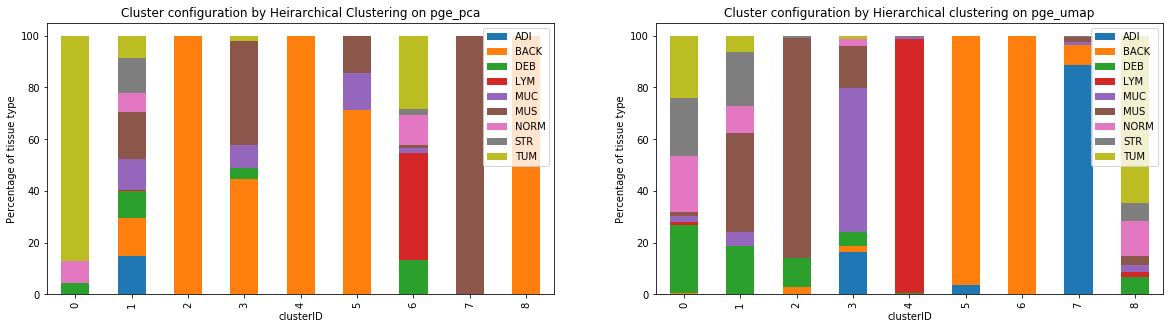

In [75]:
resulted_cluster_df = pd.DataFrame({'clusterID': heirarchical_assignment, 'type': t_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')

f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Heirarchical Clustering on pge_pca')

resulted_cluster_df = pd.DataFrame({'clusterID': heirarchical_assignment_umap, 'type': u_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Hierarchical clustering on pge_umap')

f.show()



C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



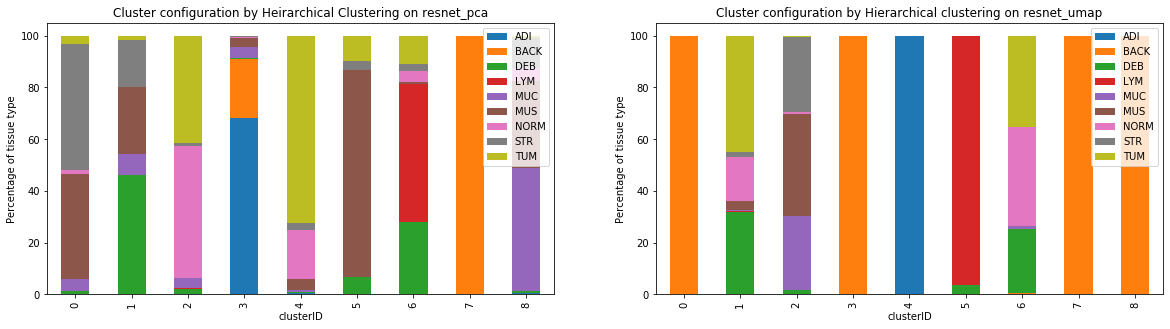

In [76]:
resulted_cluster_df = pd.DataFrame({'clusterID': heirarchical_assignment_rpca, 'type': resnetp_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')

f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Heirarchical Clustering on resnet_pca')

resulted_cluster_df = pd.DataFrame({'clusterID': heirarchical_assignment_rumap, 'type': resnetu_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Hierarchical clustering on resnet_umap')

f.show()



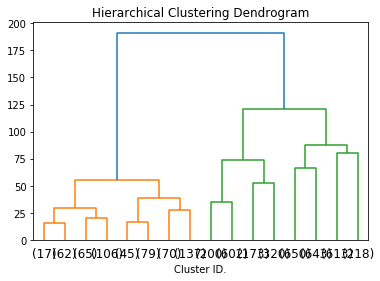

In [77]:
from scipy.cluster.hierarchy import dendrogram,linkage

plt.title("Hierarchical Clustering Dendrogram")
#plot the 9 levels of the dendogram

Z = linkage(pathology,'ward')
dendrogram(Z, truncate_mode="level", p=3)
plt.xlabel("Cluster ID.")
plt.show()


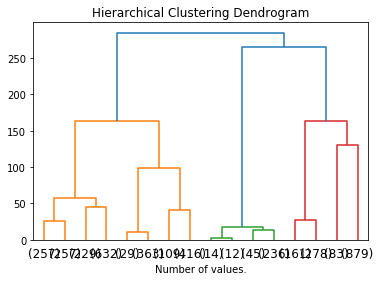

In [78]:
plt.title("Hierarchical Clustering Dendrogram")
#plot the 9 levels of the dendogram

Z = linkage(pathology_umap,'ward')
dendrogram(Z, truncate_mode="level", p=3)
plt.xlabel("Number of values.")
plt.show()
